# Load and Show Image

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
img = cv2.imread("/content/foropencvclass.jpg",1)
cv2_imshow(img)

AttributeError: ignored

# Extrack Specific Part From Image

In [ ]:
#first two values up and down and second values left and right
roi = img[:350,500:750]
cv2_imshow(roi)

TypeError: ignored

# Resizing the Image

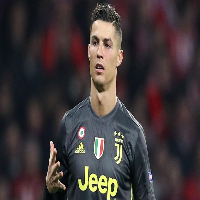

In [ ]:
resized = cv2.resize(img, (200, 200))
cv2_imshow(resized)

# Smoothing the Image


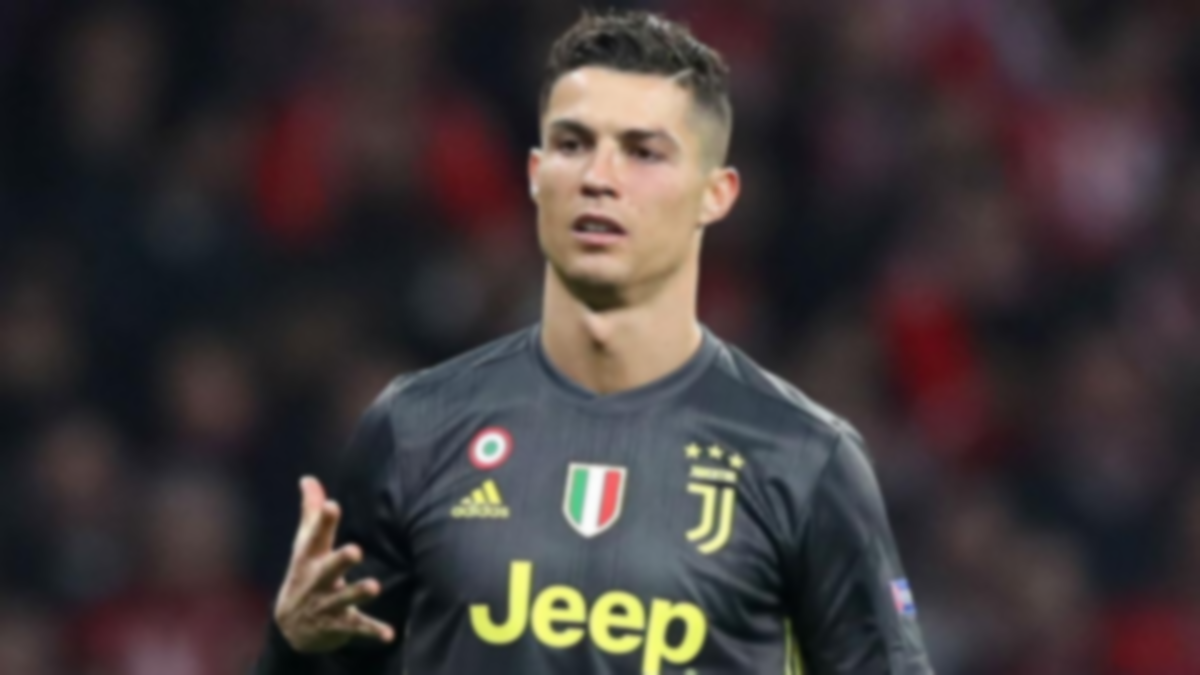

In [ ]:
blurred = cv2.GaussianBlur(img, (15, 15), 0)
cv2_imshow(blurred)

# Draw Something on Image

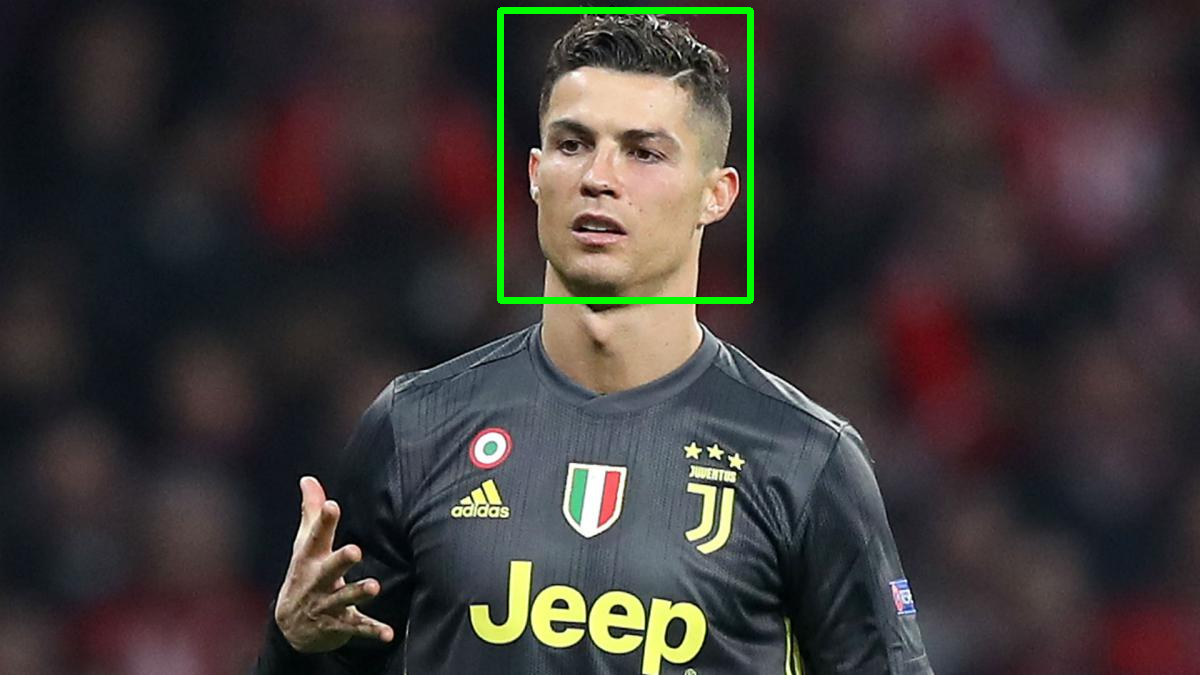

In [ ]:
output = img.copy()
#first value is represent left
#second value is represent up
#third value is represent right
#forth value is represent down
cv2.rectangle(output, (500, 10), (750, 300), (0, 255, 0), 5)
cv2_imshow(output)


# Write Some text on image

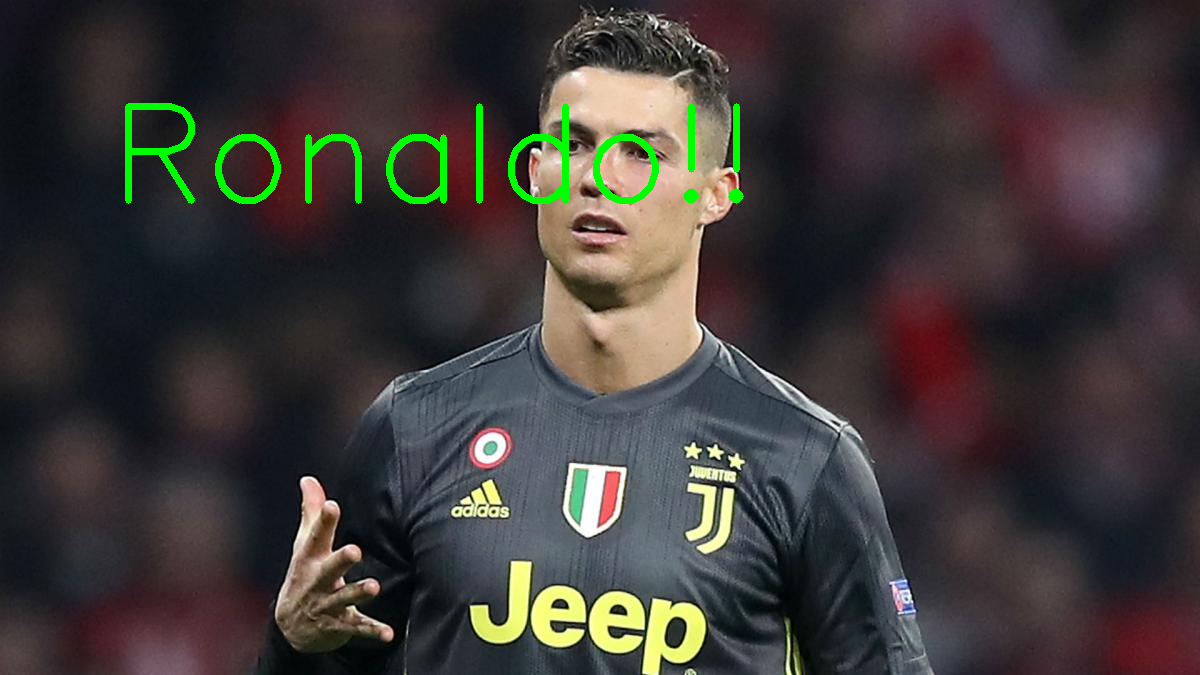

In [ ]:
output = img.copy()
cv2.putText(output, "Ronaldo!!", (110, 200), 
	cv2.FONT_HERSHEY_SIMPLEX, 4.5, (0, 255, 0), 5)
cv2_imshow(output)

# Implementation of Face detection model


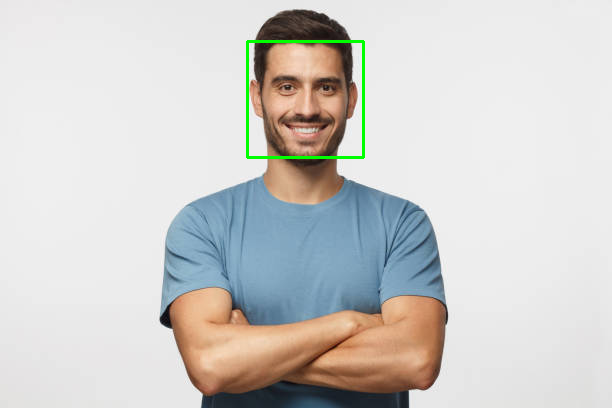

In [ ]:
import cv2

faceCascade = cv2.CascadeClassifier("/content/haarcascade_frontalface_default.xml")


img2 = cv2.imread("/content/istockphoto-1045886560-612x612.jpg")
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(gray)

# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img2, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Display the resulting frame
cv2_imshow(img2)

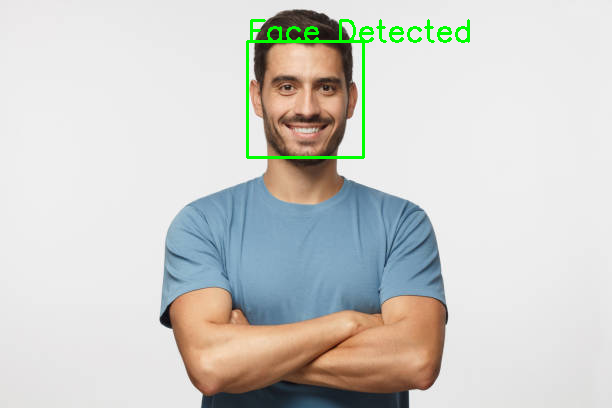

In [ ]:
import cv2

faceCascade = cv2.CascadeClassifier("/content/haarcascade_frontalface_default.xml")


img2 = cv2.imread("/content/istockphoto-1045886560-612x612.jpg")
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(gray)

# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img2, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(img2, "Face Detected", (x, y), 
	cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

# Display the resulting frame
cv2_imshow(img2)


# Accessing The Camera

In [ ]:
import cv2 
# Open the device at the ID 0

cap = cv2.VideoCapture(0)

while(True):

# Capture frame-by-frame

    ret, frame = cap.read()
    cv2.imshow('preview',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
      break

cap.release()

cv2.destroyAllWindows()


In [ ]:
import cv2

faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

video_capture = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(gray)

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, "Face Detected", (x, y), 
	cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display the resulting frame
    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()

# Deep Neural Network

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.4.1


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
train_images.shape


(60000, 28, 28)

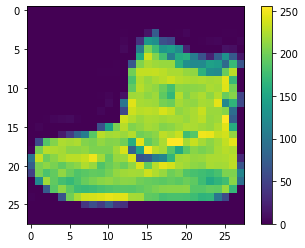

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0


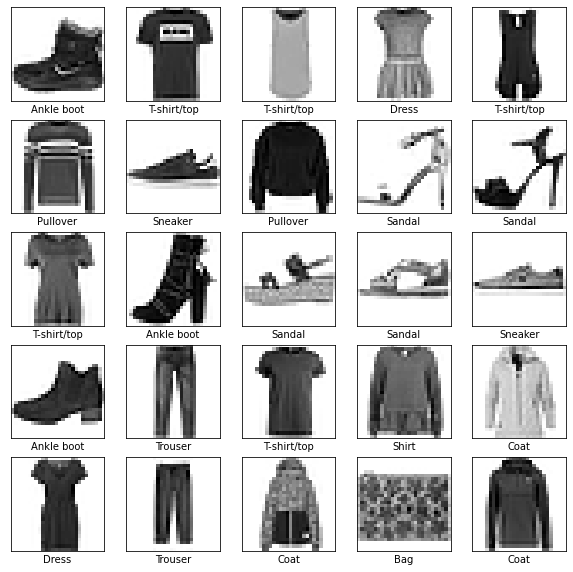

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6321 - accuracy: 0.7787
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3876 - accuracy: 0.8597
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3412 - accuracy: 0.8768
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3148 - accuracy: 0.8839
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2981 - accuracy: 0.8893


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 1s - loss: 0.3649 - accuracy: 0.8649

Test accuracy: 0.8648999929428101


In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


In [ ]:
predictions = probability_model.predict(test_images)

np.argmax(predictions[0])



9

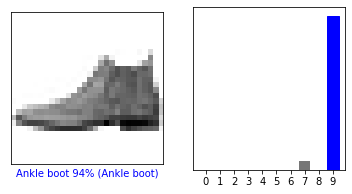

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


# MNIST Handwritten Digit Classification

In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


1


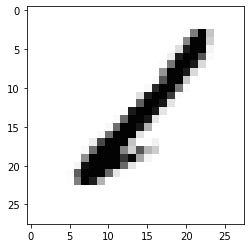

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
image_index = 7789 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [ ]:

# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation="softmax"))

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=4)

Epoch 1/4
1875/1875 [==============================] - 36s 2ms/step - loss: 0.3656 - accuracy: 0.8912
Epoch 2/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0928 - accuracy: 0.9715
Epoch 3/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0663 - accuracy: 0.9791
Epoch 4/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0463 - accuracy: 0.9855


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0533 - accuracy: 0.9842


[0.05329417809844017, 0.9842000007629395]

The result of machine predicted is:  5


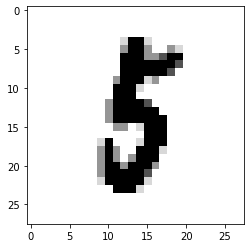

In [ ]:
image_index = 4356
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print("The result of machine predicted is: ",pred.argmax())